In [1]:
# IMPORT DATA

import pandas as pd
import matplotlib
from matplotlib import pylab as plt
import numpy as np

X_train = pd.read_csv("preprocessed_data/X_train_prepro.csv")
X_val = pd.read_csv("preprocessed_data/X_val_prepro.csv")
X_test = pd.read_csv("preprocessed_data/X_test_prepro.csv")

# add a random column to test the coefficients
X_test["rand"] = np.random.randint(0, 1, X_test.shape[0])
X_train["rand"] = np.random.randint(0, 1, X_train.shape[0])
X_val["rand"] = np.random.randint(0, 1, X_val.shape[0])


y_train = pd.read_csv("split_data/y_train.csv")
y_val = pd.read_csv("split_data/y_val.csv")
y_test = pd.read_csv("split_data/y_test.csv")




from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score




In [11]:
# RIDGE REGRESSION

alpha = np.logspace(-3, 0, 100)
rmse_scores_val = []
rmse_scores_train = []
rmse_scores_test = []
r2_scores_val = []
r2_scores_train = []
r2_scores_test = []
ws = []
models = []


for a in alpha:
    lin_reg = Ridge(alpha=a, random_state = 15)
    lin_reg.fit(X_train, y_train) # fit model on the training data
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    rmse_scores_train.append(np.sqrt(mean_squared_error(y_train,lin_reg.predict(X_train)))) # predict y_train
    rmse_scores_val.append(np.sqrt(mean_squared_error(y_val,lin_reg.predict(X_val)))) # predict y_val
    rmse_scores_test.append(np.sqrt(mean_squared_error(y_test,lin_reg.predict(X_test)))) # predict y_test
    r2_scores_train.append(r2_score(y_train,lin_reg.predict(X_train)))
    r2_scores_val.append(r2_score(y_val,lin_reg.predict(X_val)))
    r2_scores_test.append(r2_score(y_test,lin_reg.predict(X_test)))

print(ws[0])


# FOR LASSO - KEEP INCREASING MAX_ITER, BRING IT UP TO A MILLION 
    

[[  32.88249732   30.38461351   17.97493781   73.59229899   71.56091838
    14.647832     -4.66729562   -7.51424876  -76.92912656  -40.73267508
    15.90496229    7.79050173    0.23106654   -0.19421531    5.25616306
   -73.36808068  -81.89577785    4.05266588 -125.48403949  -47.29206899
     2.92056165  -26.04899389  -14.66102859  -48.37000812  -36.87030776
    49.47992382   31.17449434  -37.32938491   85.53210941   21.21266854
   -67.59138275  -11.69816367  -10.48126934  -33.91653063   -1.85266429
    -2.24094676  -37.00951607  178.09692646   44.35376559  -38.04505846
    90.15937149   35.5935094    66.57115346   63.52043893   43.59296095
    26.83304834  101.4813081   -97.95432757    1.17521765   99.97873721
   -24.29264981  -19.84682107   19.05519987   83.11136403   -3.69883342
   -93.11543199  -58.06421478  -55.08567147 -140.24473386  -51.32583919
     3.0158526   -16.49430817   94.08377588    0.        ]]


In [12]:
# LASSO REGRESSION

alpha = np.logspace(-3, 0, 100)
rmse_scores_val = []
rmse_scores_train = []
rmse_scores_test = []
r2_scores_val = []
r2_scores_train = []
r2_scores_test = []
ws = []
models = []


for a in alpha:
    lin_reg = Lasso(alpha=a, random_state = 15, max_iter = 1000000)
    lin_reg.fit(X_train, y_train) # fit model on the training data
    ws.append(lin_reg.coef_)
    models.append(lin_reg)
    rmse_scores_train.append(np.sqrt(mean_squared_error(y_train,lin_reg.predict(X_train)))) # predict y_train
    rmse_scores_val.append(np.sqrt(mean_squared_error(y_val,lin_reg.predict(X_val)))) # predict y_val
    rmse_scores_test.append(np.sqrt(mean_squared_error(y_test,lin_reg.predict(X_test)))) # predict y_test
    r2_scores_train.append(r2_score(y_train,lin_reg.predict(X_train)))
    r2_scores_val.append(r2_score(y_val,lin_reg.predict(X_val)))
    r2_scores_test.append(r2_score(y_test,lin_reg.predict(X_test)))

print(ws[0])

[ 11.7804334   19.14252696 -10.34722904  -0.          13.53111881
  -0.         -12.3955904    3.2178689   -5.85046975 -15.93988196
   0.           3.962183     1.61797199   7.76089916  -0.
  18.55866348 -23.10299002  -5.02964845  -0.03111919  -0.15554983
  -0.           0.96863283   5.4368405   -8.73113644  -0.25382016
 -10.84095486  19.09454809   5.48450689   3.53476602  -0.
  -1.08516467  -7.09776806   0.98358664   0.         -19.77834774
  -0.           0.          14.71925656   0.78393704  -0.
   0.          -2.01550252   3.98520881   0.           9.52895332
  -2.18025109  -1.19116378 -13.26436255   0.           0.34654132
   2.78579894   0.          -0.           1.14316636   0.
   0.          -0.          -1.3362411    0.           2.90663158
  -4.37210802   2.55695129  -0.           0.        ]


Text(0.5, 1.0, 'RMSE vs. Alpha (Lasso regularization)')

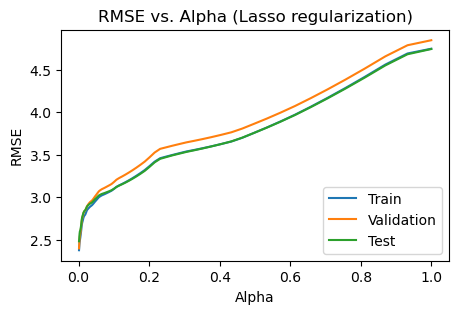

In [13]:
plt.figure(figsize=(5,3))
plt.plot(alpha, rmse_scores_train, label = "Train") 
plt.plot(alpha, rmse_scores_val, label = "Validation") 
plt.plot(alpha, rmse_scores_test, label = "Test") 
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.legend(loc = "lower right")
plt.title("RMSE vs. Alpha (Lasso regularization)")

# USE LOG SCALE ON THE X AXIS
# only calculate test at the very end— not for all alphas

Text(0.5, 1.0, 'R^2 vs. Alpha (Ridge regularization)')

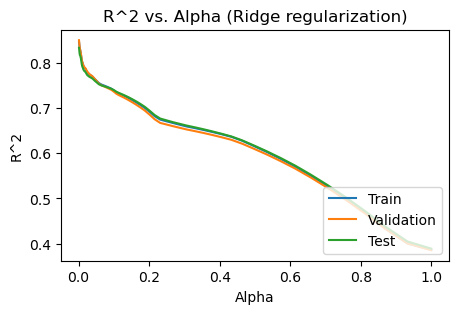

In [14]:
plt.figure(figsize=(5,3))
plt.plot(alpha, r2_scores_train, label = "Train") 
plt.plot(alpha, r2_scores_val, label = "Validation") 
plt.plot(alpha, r2_scores_test, label = "Test") 
plt.xlabel("Alpha")
plt.ylabel("R^2")
plt.legend(loc = "lower right")
plt.title("R^2 vs. Alpha (Ridge regularization)")

0
0.001


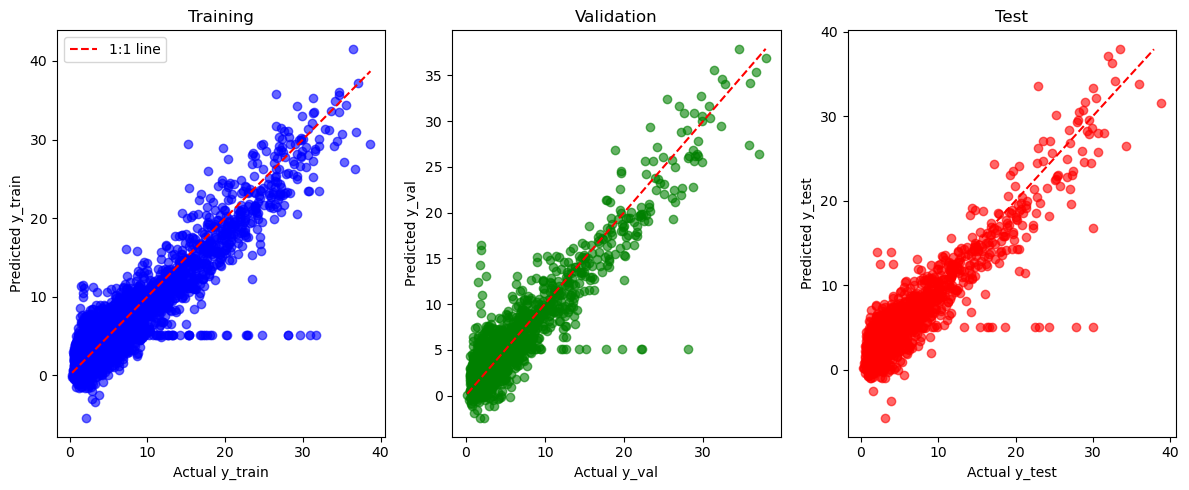

In [15]:
# FIND AND PLOT BEST MODEL

best_idx = np.argmin(rmse_scores_val) # argmin because I want to minimize rmse

print(best_idx)
best_model = models[best_idx]

print(alpha[best_idx])

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--', label="1:1 line")
plt.xlabel("Actual y_train")
plt.ylabel("Predicted y_train")
plt.title("Training")
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(y_val, y_val_pred, color='green', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label="1:1 line")
plt.xlabel("Actual y_val")
plt.ylabel("Predicted y_val")
plt.title("Validation")

plt.subplot(1, 3, 3)
plt.scatter(y_test, y_test_pred, color='red', alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label="1:1 line")
plt.xlabel("Actual y_test")
plt.ylabel("Predicted y_test")
plt.title("Test")


plt.tight_layout()
plt.show()

In [ ]:
# COULD CHECK SOME OF THESE POINTS TO SEE IF THEY WERE MEDIAN IMPUTATION

In [26]:
# ELASTIC NET REGULARIZATION

#alpha = np.linspace(0.0001, 10, 10)
#rho = np.linspace(0.0001,1,20)
#rmse_scores_val = []
#rmse_scores_train = []
#r2_scores_val = []
#r2_scores_train = []
#r2_scores_test = []
#ws = []
#models = []
#alpha_rho_pairs = []
#
#for a in alpha:
#    for r in rho:
#        lin_reg = ElasticNet(alpha=a, l1_ratio = r, max_iter=20000)
#        lin_reg.fit(X_train, y_train) # fit model on the training data
#        ws.append(lin_reg.coef_)
#        models.append(lin_reg)
#        rmse_scores_train.append(np.sqrt(mean_squared_error(y_train,lin_reg.predict(X_train)))) # predict y_train
#        rmse_scores_val.append(np.sqrt(mean_squared_error(y_val,lin_reg.predict(X_val)))) # predict y_test
#        r2_scores_train.append(r2_score(y_train,lin_reg.predict(X_train)))
#        r2_scores_val.append(r2_score(y_val,lin_reg.predict(X_val)))
#        r2_scores_test.append(r2_score(y_test,lin_reg.predict(X_test)))
#        alpha_rho_pairs.append((a,r))
#
#idx = np.argmin(rmse_scores_val)
#low_score = rmse_scores_val[idx]
#low_alpha, low_rho = alpha_rho_pairs[idx]
#
#print("Best validation RMSE score:", low_score)
#print("Corresponding alpha value:", low_alpha)
#print("Corresponding rho value:", low_rho)
        
    

In [ ]:
# APPLY TO ENTIRE DATASET

# do i need to scale everything? what should standard scalar be fit on? 